# Advanced Topics

# Drawdown
Explanation here:[http://www.investopedia.com/terms/d/drawdown.asp]

# Pairs Trading

* We will implement a simplified approach of this strategy
* We will take two securities which we believe to be paired together such as Coca-Cola or Pepsi or two airlines
* Then, we create an algorithm that trades off that relationship

In [2]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
start='2015-01-01'
end='2017-01-01'
united = quandl.get("WIKI/UAL", start_date=start, end_date=end)
united.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,67.74,68.08,65.71,66.34,6215071.0,0.0,1.0,67.74,68.08,65.71,66.34,6215071.0
2015-01-05,66.87,67.35,65.50,66.15,5033887.0,0.0,1.0,66.87,67.35,65.50,66.15,5033887.0
2015-01-06,66.63,67.00,63.11,64.58,6051891.0,0.0,1.0,66.63,67.00,63.11,64.58,6051891.0
2015-01-07,64.96,66.11,64.00,65.53,5133939.0,0.0,1.0,64.96,66.11,64.00,65.53,5133939.0
2015-01-08,65.70,67.52,65.41,66.64,6889597.0,0.0,1.0,65.70,67.52,65.41,66.64,6889597.0


In [4]:
american = quandl.get("WIKI/AAL", start_date=start, end_date=end)
american.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,54.28,54.60,53.07,53.910,10756705.0,0.0,1.0,52.873463,53.185171,51.694818,52.513051,10756705.0
2015-01-05,54.37,54.54,53.34,53.875,11565004.0,0.0,1.0,52.961131,53.126726,51.957821,52.478958,11565004.0
2015-01-06,54.27,54.43,52.13,53.040,13772171.0,0.0,1.0,52.863723,53.019577,50.779176,51.665595,13772171.0
2015-01-07,53.38,53.65,52.12,53.010,10069816.0,0.0,1.0,51.996785,52.259788,50.769435,51.636372,10069816.0
2015-01-08,53.48,54.28,53.25,53.660,9672064.0,0.0,1.0,52.094194,52.873463,51.870153,52.269529,9672064.0


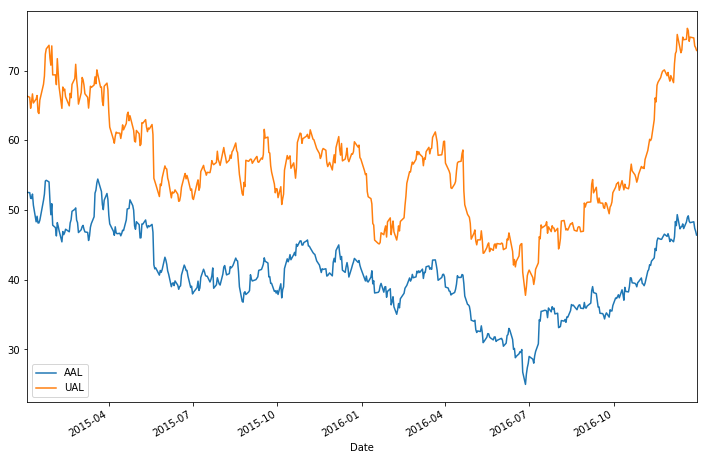

In [12]:
american['Adj. Close'].plot(label='AAL', figsize=(12,8))
united['Adj. Close'].plot(label='UAL')
plt.legend();

**Co-integration (advanced topic) is harder to find than correlation.**

Creating corrlation co-efficient matrix using numpy

In [7]:
np.corrcoef(american['Adj. Close'], united['Adj. Close'])

array([[ 1.      ,  0.923352],
       [ 0.923352,  1.      ]])

**Conclusion:** Stocks are highly correlated (value ~ 0.92)

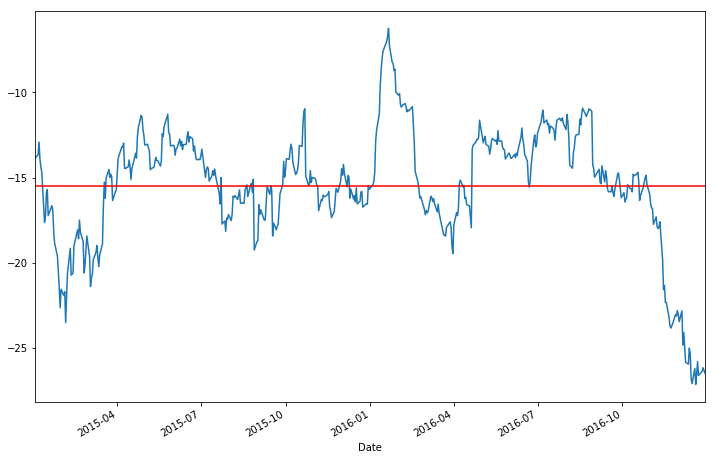

In [11]:
spread = american['Adj. Close'] - united['Adj. Close']
spread.plot(label='Spread', figsize=(12,8))
plt.axhline(spread.mean(), c='r');

* Custom Z-Score function
* Subtration of mean() from the original value updates the mean to zero.  **stocks - stocks.mean()**
* Dividing by the standard deviation causes the values to normalized between the standard deviation range. **/np.std(stocks)**

In [18]:
def zscore(stocks):
    return (stocks - stocks.mean())/np.std(stocks)

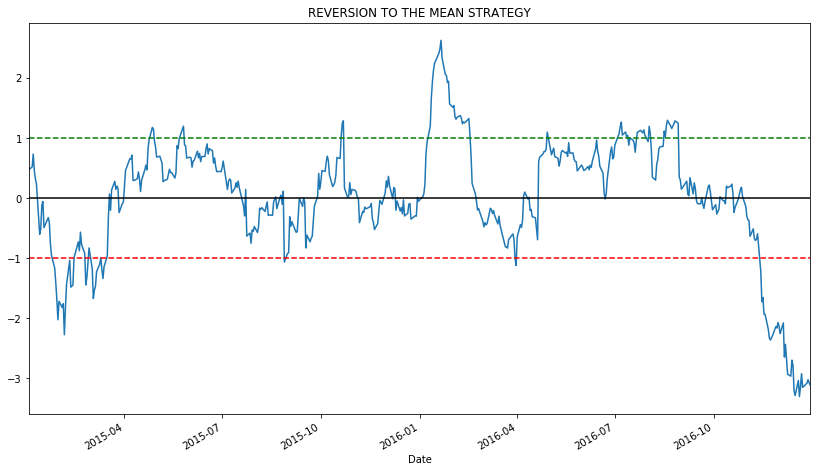

In [24]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), c='black');
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--');
plt.title('REVERSION TO THE MEAN STRATEGY')

* Calculating a rolling Z-Score of **30-day time period**

In [25]:
spread_MA_1 = spread.rolling(1).mean()      # one day moving average
spread_MA_30 = spread.rolling(30).mean()    # 30 day moving average
std_30 = spread.rolling(30).std()           # 30 day standard deviation

z_score_30_1 = (spread_MA_1 - spread_MA_30)/std_30

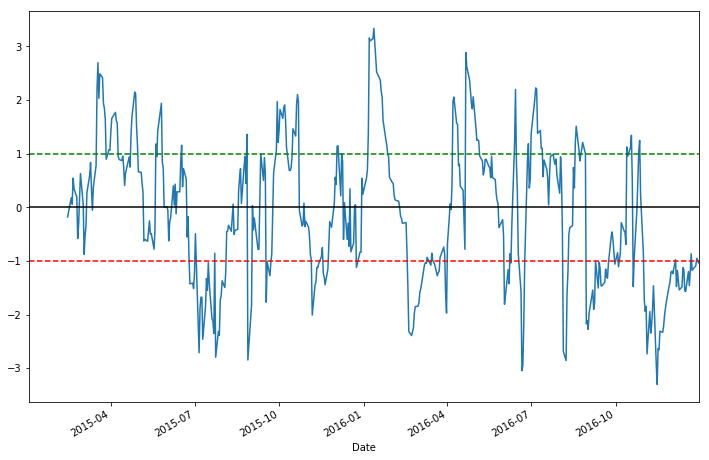

In [26]:
z_score_30_1.plot(figsize=(12,8), label='Rolling 30 day Z-score')
plt.axhline(0, color='black')
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--');